# <center>Semana de la Ciencia </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools as it
import json
#from tqdm import tqdm_notebook as tqdm
import matplotlib.patches as patches
import collections
from IPython.display import Image

In [2]:
from numpy.random import default_rng
rg = default_rng(12345)

## <center>Lo que vemos y el azar</center>

[Wiki Color](https://en.wikipedia.org/wiki/Primary_color)

[Wiki RGB model](https://en.wikipedia.org/wiki/RGB_color_model)

[Cambrige Color perception](https://www.cambridgeincolour.com/tutorials/color-perception.htm)

[SicienceDirect Human-Color vision](https://www.sciencedirect.com/topics/engineering/human-color-vision)

## <center>Black and White</center>

In [3]:
N = 50 
matrix = rg.integers(2, size=N*N).reshape(N,N)

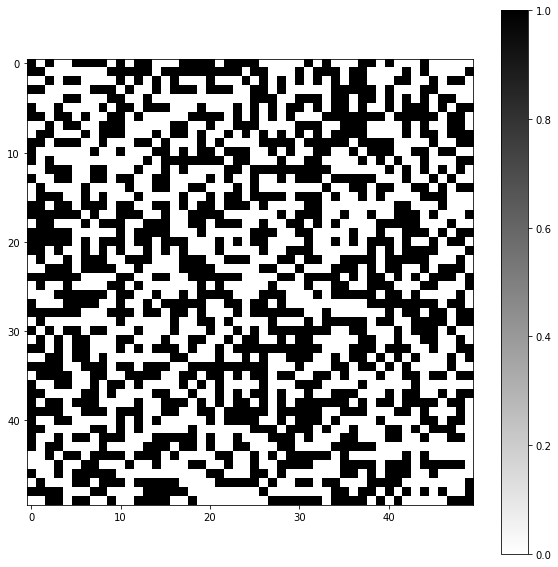

In [4]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.imshow(matrix, cmap= 'binary',vmin=0, vmax=1)
fig.colorbar(im)

## <center>Colors</center>

To experiment with different colormaps, take a look at 
[colormaps matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py)

In [ ]:
N = 7000 
matrix = rg.integers(124, size=N*N).reshape(N,N)

In [ ]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.imshow(matrix, cmap= 'coolwarm',vmin=0, vmax=124)
fig.colorbar(im)

In [5]:
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [6]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

In [7]:
clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

In [24]:
N = 50
matrix = rg.integers(490, 790, size=N*N).reshape(N,N)

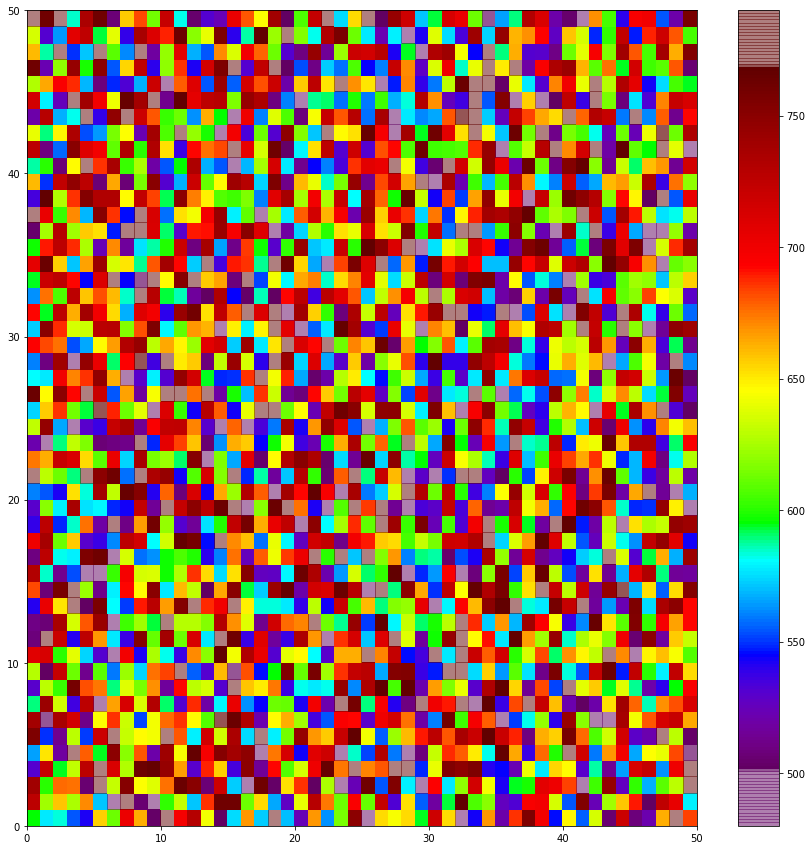

In [25]:
fig = plt.figure(1, figsize=(15, 15))
ax = fig.add_subplot(111)
psm = ax.pcolormesh(matrix, cmap=spectralmap, vmin=480, vmax=790)
#im = ax.imshow(matrix, cmap= 'spectralmap',vmin=0, vmax=124)
fig.colorbar(psm)

In [26]:
matplotlib.colors.to_rgba_array('white')

array([[1., 1., 1., 1.]])

In [ ]:
vals = range(256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))
vals

In [ ]:
colors = range(256)
N = 7000
data = np.random.choice(colors, N*N)
matrix = np.array(data.reshape(N,N))
im = ax.imshow(matrix, cmap =   'Spectral',vmin=0, vmax=256)

In [ ]:
 
plt.imshow ( matrix, cmap =  'Spectral',vmin=0, vmax=256)
plt.colorbar(im)
plt.show()

In [ ]:
colors = random.choice(['red','green','blue'])

In [ ]:
Z = np.random.rand(6, 10)
Z

In [ ]:
def showConfig(N):
    pieces = []
    dx, dy = 1/N, 1/N
    ax1=plt.subplot(111,aspect='equal')
    for i in range(N):
        for j in range(N): 
            c =   random.choice(['red','green','blue'])  
            p = patches.Rectangle(
                    (i/N,j/N), dx,dy, facecolor=c, fill=True,linewidth=0.5 )
            pieces.append(p)   
    
    for p in pieces: ax1.add_patch(p)
    plt.axis('off')
    plt.show() 
     
    
      

In [ ]:
showConfig(250)

In [ ]:
Image(url= "flip_cube.jpg", width=300, height=300)

In [ ]:
colors = {'g': 'green',
          'b': 'blue',
          'y': 'yellow',
          'p': 'purple',
          's': 'grey',
          'o': 'orange',
          'w': 'white',
          'r': 'red'  
        }

In [ ]:
diskColors = ("g", "b")
sideColors = ("y", "p", "s", "o", "w", "r")

In [ ]:
pieces =  it.chain.from_iterable(zip(diskColors,[x,x]) for x in sideColors)  

In [ ]:
config = it.permutations(pieces)

In [ ]:
startn = next(config) 

In [ ]:
start = (('b', 'p'),
 ('b', 'y'),
 ('b', 's'),
 ('b', 'r'),
 ('b', 'w'),
 ('b', 'o'),
 ('g', 'w'),
 ('g', 'y'),
 ('g', 'r'),
 ('g', 's'),
 ('g', 'p'),
 ('g', 'o'))

In [ ]:
target = (('g', 'y'),
 ('g', 'p'),
 ('g', 'r'),
 ('g', 'w'),
 ('g', 's'),
 ('g', 'o'),
 ('b', 'y'),
 ('b', 'p'),
 ('b', 'r'),
 ('b', 'w'),
 ('b', 's'),
 ('b', 'o'))

In [ ]:
def showConfig(cf):
    "graphics representation of the puzzle"
    tt = [a[0] for a in cf][0:6]  
    mt = [a[1] for a in cf][0:6]
    mb = [a[1] for a in cf][6:12]
    bb = [a[0] for a in cf][6:12] 
    
    ax1=plt.subplot(111,aspect='equal')
    ls = tt + mt + mb + bb
    dx, dy = 1/6, 1/4
    pieces = []
    for j in range(24):
        x, cnt = (j%6)/6, j//6+1
        color = colors[ls[j]]
        p = patches.Rectangle(
                    (x,1-cnt/4), dx,dy, edgecolor="white", facecolor=color, fill=True,linewidth=0.5 )
        pieces.append(p)
    
    for p in pieces: ax1.add_patch(p)
    plt.axis('off')
    plt.show()   

In [ ]:
showConfig(startn)

## Operations affecting a given configuration 

In [ ]:
def halfFlip(cf):
    lst = list(cf)
    lst[0],lst[1],lst[2],lst[6],lst[7],lst[8] = lst[8],lst[7],lst[6], lst[2], lst[1], lst[0]
    return tuple(lst)

In [ ]:
def totalRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(n)
    return tuple(t+b)

In [ ]:
def topRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(n)
    b.rotate(0)
    return tuple(t+b)

In [ ]:
def bottRot(n, cf):
    t, b = cf[0:6], cf[6:12]
    t, b = collections.deque(t), collections.deque(b)
    t.rotate(0)
    b.rotate(n)
    return tuple(t+b)

In [ ]:
def flip(cf):
    cff = list(cf)
    cff.reverse()
    return tuple(cff)

## The metric space

If  *cf* and  *cg* are given configurations, then the geodesic distance,    defined as the minimum number of operations  necessary to go from *cf* to *cg*, is a metric in the configuration space. Spheres and balls of an integer radius *n* centered at a configuration point are expensive to calculate if *n>12*.  

In [ ]:
def sphere1(cf):
    "sphere of radius 1 centered at cf"
    sph = []
    tRp, tRm = topRot(1, cf), topRot(-1, cf)
    #bRp, bRm = bottRot(1, cf), bottRot(-1, cf)
    sph.append(tRp)
    sph.append(tRm)
    #sph.append(bRp)
    #sph.append(bRm)
    for n in range(3):
        totalR= totalRot(n, cf)
        sph.append(halfFlip(totalR))
    return set(sph)   

In [ ]:
def ssphere1(cf):
    "sphere of radius 1 centered at cf"
    sph = []
    tRp, tRm = topRot(1, cf), topRot(-1, cf)
    bRp, bRm = bottRot(1, cf), bottRot(-1, cf)
    sph.append(tRp)
    sph.append(tRm)
    sph.append(bRp)
    sph.append(bRm)
    for n in range(6):
        totalR= totalRot(n, cf)
        sph.append(halfFlip(totalR))
    return sph

Now, a given configuration defines a  class of equivalence in a natural way by means of flipping a rotating the cylinder as a whole. 

In [ ]:
def equiv_class(cf):
    "flippings and  (whole) rotations of a given configuration of the  puzzel "
    ec = []
    for n in range(6):
        tR = totalRot(n,cf)
        ec.append(tR)
        tRR = list(tR)
        tRR.reverse()
        ec.append(tuple(tRR))
    return set(ec)

In [ ]:
class_target = equiv_class(target)

In [ ]:
def closed_ball(cf, n):
    "closure of the  ball centered at cf having radius n"
    if n < 2: return  sphere1(cf) | {cf} 
    B = set(it.chain.from_iterable(sphere1(x) for x in closed_ball(cf, n-1)))
    return B    

In [ ]:
def sphere(cf, n):
    "sphere centered at cf having radius n"
    if n < 2: return  sphere1(cf) 
    S_ext = set(it.chain.from_iterable(sphere1(x) for x in sphere(cf, n-1)))
    S_class = set(it.chain.from_iterable(equiv_class(x) for x in closed_ball(cf, n-1)))
    return  S_ext - S_class

## Checking sets

In [ ]:
def check_identity(cf,cg):
    "It returns True if configuration cf belong to the equivalent class of cg "
    d = False
    cg_class = equiv_class(cg)
    if cf in cg_class: d = True
    return d

In [ ]:
def check(A):
    '''
    check whether A contains repeated elements. It returns a list of pairs (cf,cg) of 
    configurations such that cf belongs to the equivalence class of cg
    '''
    AA = list(A)
    B = list(it.combinations(AA,2))
    C =  it.starmap(check_identity,B)
    return list(it.compress(B,C)) 

In [ ]:
def simplify(A):
    dups = check(A)
    return A - {dup[0] for dup in dups}

In [ ]:
def check_target(cf):
    "It returns True if configuration cf belong to the equivalent class of target "
    d = False 
    if cf in class_target: d = True
    return d

In [ ]:
def noTarget(cf):
    "It returns False if configuration cf belong to the equivalent class of target "
    d = True 
    if cf in class_target: d = False
    return d

 *target* and   *start*  seems  to be exactly   14 steps  away 

In [ ]:
n = 7
Bs  = closed_ball(start, n)
Bs_class = set(it.chain.from_iterable(equiv_class(x) for x in Bs)) 
Bt = closed_ball(target, n)
#TT = set(tuple(it.chain.from_iterable(equiv_class(x) for x in T)))
I = (Bs_class & Bt)
(len(I),len(check(I)))

## Random walk
Reaching  the *target* starting at *start* by means of a random walk

In [ ]:
def finiteDrunkard(n):
    ''' A random walk of *n* steps starting at *start* '''
    i = 0
    z = start
    while i < n:
        z = random.choice(ssphere1(z))
        i += 1
        yield z 

In [ ]:
def drunkard():
    ''' An iterator giving the next step of a randow walk  starting at *cf* '''
    z = start
    while True:
        z = random.choice(ssphere1(z))
        yield z  

In [ ]:
fitt = finiteDrunkard(3)

In [ ]:
for cf in list(fitt):
    showConfig(cf)

In [ ]:
random.seed(4)
ll = []
nn = 0
while nn < 5000:
    fitt = finiteDrunkard(1000)
    z = list(it.filterfalse(noTarget,fitt))
    if len(z)>0 : ll.append((nn,z))
        #break
    nn+= 1    
       

In [ ]:
ll[0][1][0]

In [ ]:
random.seed(5)
ll = []
nn = 0
itt = drunkard()
while nn < 5000:
    z = next(itt)
    i += 1
    if check_target(z): 
        ll.append(z)
        print("got target")
        break
    nn+= 1  
ll

In [ ]:
itt = drunkard()

In [ ]:
z = next(itt)
showConfig(z)
    

## Geometrical analysis

In [ ]:
S1, B1 = simplify(sphere(start,1)), closed_ball(start,1)
S2, B2 = simplify(sphere(start,2)), closed_ball(start,2)
S3, B3 = simplify(sphere(start,3)), closed_ball(start,3)
S4, B4 = simplify(sphere(start,4)), closed_ball(start,4)
S5, B5 = simplify(sphere(start,5)), closed_ball(start,5)

In [ ]:
S6, B6 = simplify(sphere(start,6)), closed_ball(start,6)

In [ ]:
(len(S1), len(S2), len(S3), len(S4), len(S5), len(S6))

In [ ]:
# the simplify function is expensive to use
S7, B7 =  sphere(start,7), closed_ball(start,7)

Checking that *sphere(cf,n)* is indeed subset of *closed_ball(cf,n)*

In [ ]:
ll = []
S, B = S4, B4
for x in S:
    z = [check_identity(x,y) for y in B].count(True)
    ll.append(z)
    if z==0: 
        print("no subset")
        break        
sum(ll) - len(S)

It seems to be that the geodesic distance between two different points in a any  sphere is greater than 1. Below we check that for *S1, ... , S5*

In [ ]:
S = S7
lst = []
for cf in S:
    T = sphere1(cf)
    T_class = set(it.chain.from_iterable(equiv_class(x) for x in T))   
    z = len(T_class&S)
    lst.append(z)
sum(lst)    

## Inner and outer regions of a sphere  

In [ ]:
#Sm, S  = simplify(sphere(target,4)),  simplify(sphere(target,5))
Sm, S  = S4,  S5

In [ ]:
lst = [] 
for cf in S:
    T = sphere1(cf)
    T_class = set(it.chain.from_iterable(equiv_class(x) for x in T))
    z = len(T_class&Sm)
    if z == 0: break
        
    lst.append(z)
[lst.count(i) for i in range(6)]

In [ ]:
sum(_) -len(S)

In [ ]:
def neighboring(S):
#############  local function 
    def count(pair):
        H, K = sphere1(pair[0]), sphere1(pair[1])
        return [check_identity(x,y) for x in H for y in K].count(True)
######################################
    pairs = list(it.combinations(S,2))
    return {pair:count(pair) for pair in pairs}

In [ ]:
S = S5
dct = neighboring(S)
neighbors = [v for v in dct.items() if v[1]==1] 

In [ ]:
lst = []
for cf in S:
    z =  len([v[0] for v in neighbors if (v[0][0]==cf or v[0][1]==cf)] )
    lst.append(z)
[lst.count(n) for n in range(10)]
 

In [ ]:
[lst.count(n) for n in range(21)]

In [ ]:
z = random.choice(list(S))
check_belong(z,S)

Lexicographic distance between two points in the configuration space are easy to calculate. The trouble is that the topology induced by the lexicograpich distance is not equivalent to the one induced by the geodesic distance

In [ ]:
def lexi_dist(x,y):
    "lexicographic distance between two points in the configuraion space"
    def dist_help(x,y):
        d = 0
        for n in range(12):
            if x[n] != y[n]: d= d+1
        return d
    EC = equiv_class(y) 
    dt = [dist_help(x,z) for z in EC]
    return min(dt)